In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing imp libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy.stats import linregress
import geopandas as gpd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import geopandas as gpd


In [3]:
# Load the dataset
merged_df = pd.read_csv("/content/drive/MyDrive/Impact_Scholars/merged_with_uhi.csv")
merged_df.head(3)

,Unnamed: 0,state_ut,year,HRDs,heatwave_days,median_wbt,total_population,area_km2,pop_density,HRDs_per_hw_day,system:index,UHI_intensity,rural_mean_LST,urban_mean_LST,.geo
0,0,andhra pradesh,2001,46,20,22.679109,42201091,163014.630122,258.879163,2.190476,1_000000000000000001d8,0.447105,4.142080,4.589184,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,1,assam,2001,7,7,19.547613,23280745,78458.757933,296.725893,0.875000,1_000000000000000001d9,1.828476,6.309976,8.138452,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,2,bihar,2001,47,5,23.027893,66351120,94191.721687,704.426236,7.833333,1_000000000000000001ef,1.635784,12.709964,14.345748,"{""type"":""MultiPoint"",""coordinates"":[]}"


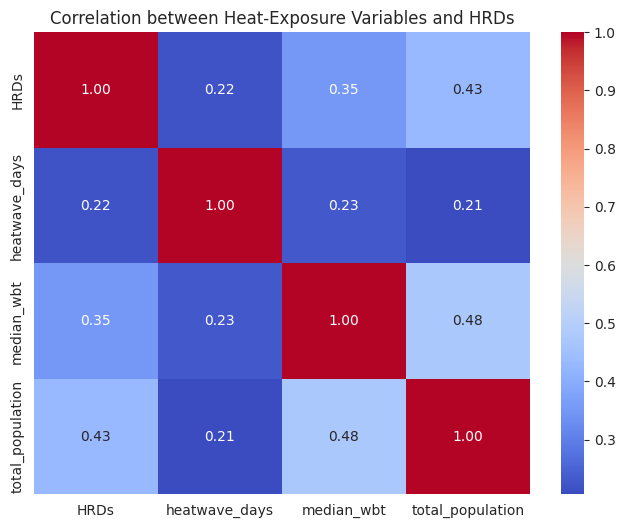

In [ ]:
# Correlation matrix
# Select relevant columns
corr_vars = ["HRDs", "heatwave_days", "median_wbt", "total_population"]

# Compute correlation matrix
corr_matrix = merged_df[corr_vars].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Heat-Exposure Variables and HRDs")
plt.show()

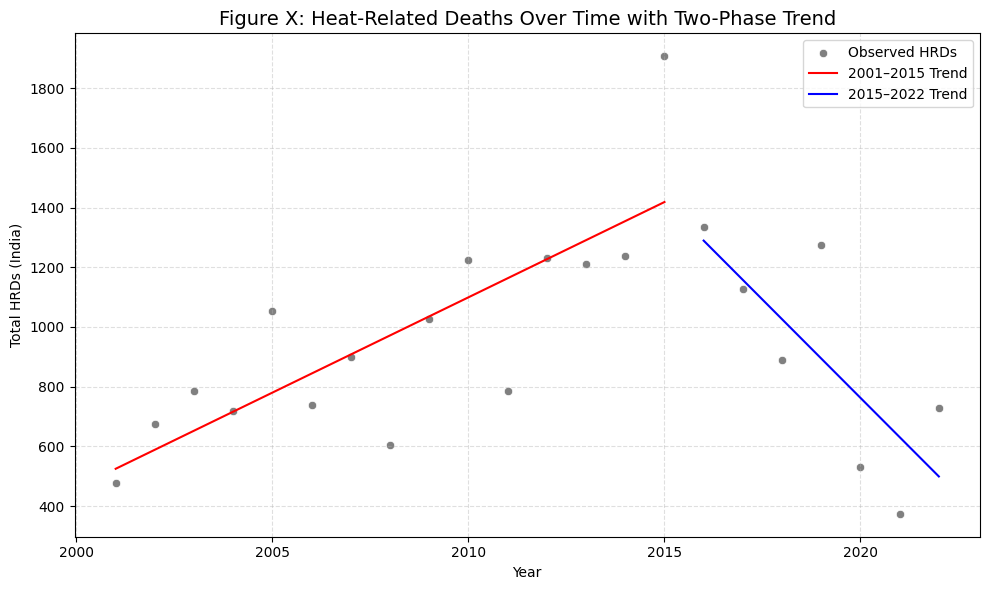

Phase 1 Slope (2001–2015): 63.83, r=0.79, p=0.0004
Phase 2 Slope (2015–2022): -131.68, r=-0.77, p=0.0440


In [4]:
# Aggregate national HRDs per year
df_yearly = merged_df.groupby("year")["HRDs"].sum().reset_index()

# Split data into two segments
df1 = df_yearly[df_yearly["year"] <= 2015]
df2 = df_yearly[df_yearly["year"] > 2015]

# Compute regressions
slope1, intercept1, r1, p1, _ = linregress(df1["year"], df1["HRDs"])
slope2, intercept2, r2, p2, _ = linregress(df2["year"], df2["HRDs"])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_yearly, x="year", y="HRDs", color="gray", label="Observed HRDs")

# Overlay trendlines
plt.plot(df1["year"], intercept1 + slope1 * df1["year"], color="red", label="2001–2015 Trend")
plt.plot(df2["year"], intercept2 + slope2 * df2["year"], color="blue", label="2015–2022 Trend")

# Labels
plt.title("Figure X: Heat-Related Deaths Over Time with Two-Phase Trend", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total HRDs (India)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
# plt.savefig("Figure_HRD_TwoPhases.png", dpi=300)
plt.show()

print(f"Phase 1 Slope (2001–2015): {slope1:.2f}, r={r1:.2f}, p={p1:.4f}")
print(f"Phase 2 Slope (2015–2022): {slope2:.2f}, r={r2:.2f}, p={p2:.4f}")


""" The national trend in heat-related deaths (HRDs) over the 2001–2022 period exhibits two statistically distinct phases. From 2001 to 2015, there was a significant upward trajectory (slope = 63.83 deaths/year, r = 0.79, p < 0.001), suggesting increasing exposure and vulnerability to extreme heat events. However, this trend reverses post-2015, with a marked decline in HRDs between 2015 and 2022 (slope = –131.68 deaths/year, r = –0.77, p = 0.044). This turning point may reflect the impact of early-stage heat action plans, public awareness campaigns, or improved early warning systems. The sharp contrast in these phases highlights the importance of treating HRDs as a dynamic outcome of both climate and adaptive interventions.

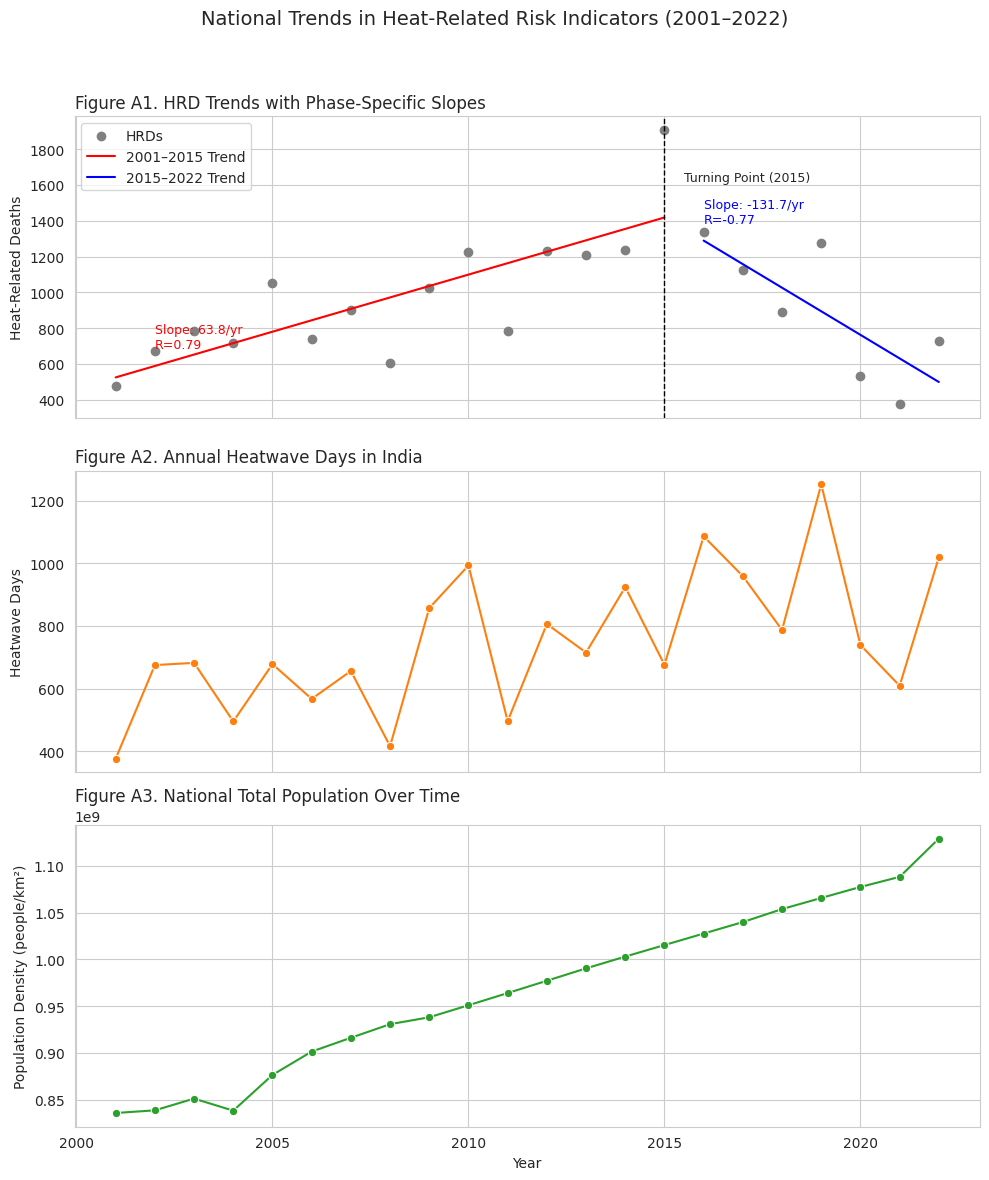

In [ ]:
# National trends

# Prepare data
df_yearly = merged_df.groupby("year")[["HRDs", "heatwave_days", "total_population"]].sum().reset_index()

# Segment HRD trend
df1 = df_yearly[df_yearly["year"] <= 2015]
df2 = df_yearly[df_yearly["year"] > 2015]
slope1, intercept1, r1, p1, _ = linregress(df1["year"], df1["HRDs"])
slope2, intercept2, r2, p2, _ = linregress(df2["year"], df2["HRDs"])

# Set up figure
sns.set_style("whitegrid")
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# === Panel (a): HRDs ===
axs[0].scatter(df_yearly["year"], df_yearly["HRDs"], color="gray", label="Observed HRDs")
axs[0].plot(df1["year"], intercept1 + slope1 * df1["year"], color="red", label="2001–2015 Trend")
axs[0].plot(df2["year"], intercept2 + slope2 * df2["year"], color="blue", label="2015–2022 Trend")
axs[0].axvline(x=2015, color="black", linestyle="--", linewidth=1)
axs[0].text(2015.5, df_yearly["HRDs"].max()*0.85, "Turning Point (2015)", fontsize=9)

# Annotate slope + r values
axs[0].text(2002, intercept1 + slope1 * 2002 + 100, f"Slope: {slope1:.1f}/yr\nR={r1:.2f}", color="red", fontsize=9)
axs[0].text(2016, intercept2 + slope2 * 2016 + 100, f"Slope: {slope2:.1f}/yr\nR={r2:.2f}", color="blue", fontsize=9)

axs[0].set_ylabel("Heat-Related Deaths")
axs[0].set_title("Figure A1. HRD Trends with Phase-Specific Slopes", loc='left', fontsize=12)
axs[0].legend()

# === Panel (b): Heatwave Days ===
sns.lineplot(data=df_yearly, x="year", y="heatwave_days", ax=axs[1], marker="o", color="tab:orange")
axs[1].set_ylabel("Heatwave Days")
axs[1].set_title("Figure A2. Annual Heatwave Days in India", loc='left', fontsize=12)

# === Panel (c): Population Density ===
sns.lineplot(data=df_yearly, x="year", y="total_population", ax=axs[2], marker="o", color="tab:green")
axs[2].set_ylabel("Population Density (people/km²)")
axs[2].set_xlabel("Year")
axs[2].set_title("Figure A3. National Total Population Over Time", loc='left', fontsize=12)

# Final layout
plt.suptitle("National Trends in Heat-Related Risk Indicators (2001–2022)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("/content/drive/MyDrive/Impact_Scholars/Figure1_HRD_Trends.png", dpi=300)
plt.show()


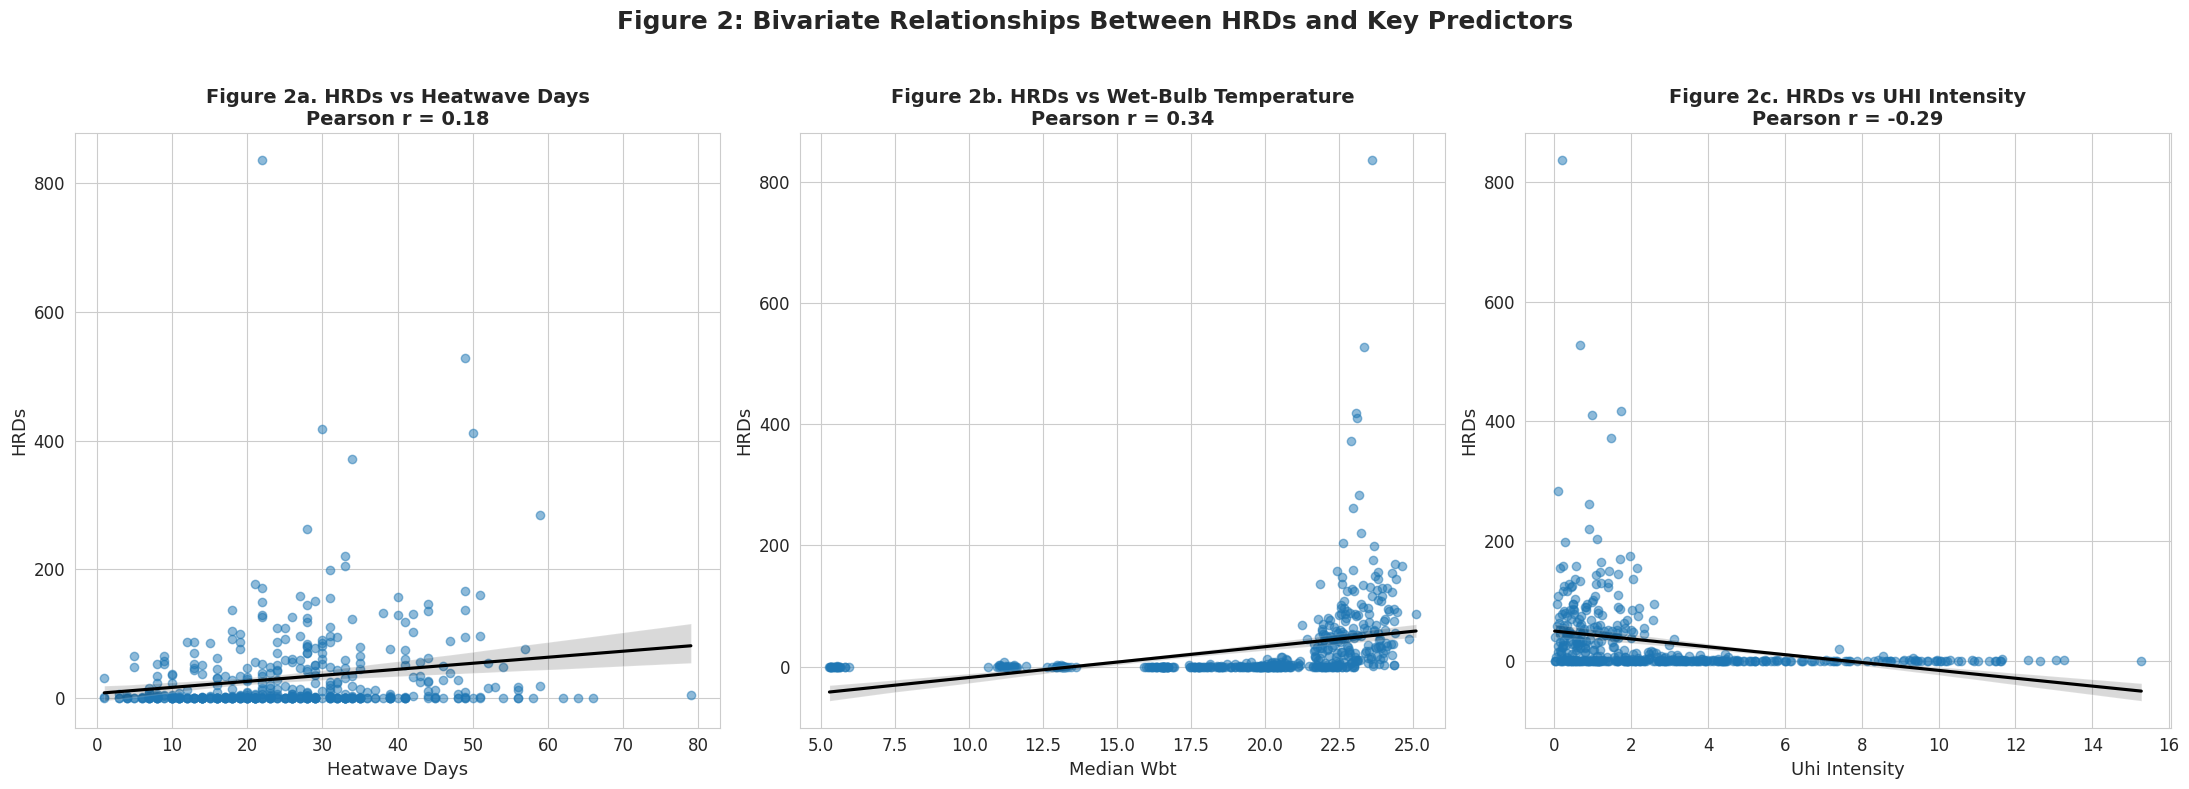

Saved to: /content/drive/MyDrive/Impact_Scholars/Figure2_HRDs_vs_Predictors_Cleaned.png


In [ ]:
# Bivariate relationship between HRDs and key predictors

# Drop NA values and filter UHI
df = merged_df[["HRDs", "heatwave_days", "median_wbt", "UHI_intensity"]].dropna()

# Remove negative UHI values
df = df[df["UHI_intensity"] >= 0]

# === Setup figure ===
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(22, 8))
axes = axes.flatten()

# === Define predictors and titles ===
predictors = ["heatwave_days", "median_wbt", "UHI_intensity"]
titles = [
    "Figure 2a. HRDs vs Heatwave Days",
    "Figure 2b. HRDs vs Wet-Bulb Temperature",
    "Figure 2c. HRDs vs UHI Intensity"
]

# === Create plots with regression lines ===
for i, predictor in enumerate(predictors):
    ax = axes[i]
    sns.regplot(
        data=df,
        x=predictor,
        y="HRDs",
        ax=ax,
        scatter_kws={"alpha": 0.5},
        line_kws={"color": "black"}
    )
    r = df[predictor].corr(df["HRDs"])
    ax.set_title(f"{titles[i]}\nPearson r = {r:.2f}", fontsize=14, fontweight="bold")
    ax.set_xlabel(predictor.replace("_", " ").title(), fontsize=13)
    ax.set_ylabel("HRDs", fontsize=13)
    ax.tick_params(labelsize=12)
    ax.grid(True)

# === Final formatting ===
plt.suptitle("Figure 2: Bivariate Relationships Between HRDs and Key Predictors", fontsize=18, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])

# === Save figure ===
output_path = "/content/drive/MyDrive/Impact_Scholars/Figure2_HRDs_vs_Predictors_Cleaned.png"
plt.savefig(output_path, dpi=400)
plt.show()

print(f"Saved to: {output_path}")


In [ ]:
# OLS regression

# Select relevant columns
df = merged_df[["HRDs", "heatwave_days", "median_wbt", "total_population"]].dropna()

# Define dependent and independent variables
X = df[["heatwave_days", "median_wbt", "total_population"]]
y = df["HRDs"]

# Add a constant (intercept term)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   HRDs   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     59.36
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           1.13e-33
Time:                        14:19:38   Log-Likelihood:                -3368.1
No. Observations:                 613   AIC:                             6744.
Df Residuals:                     609   BIC:                             6762.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -54.4430     12.358  

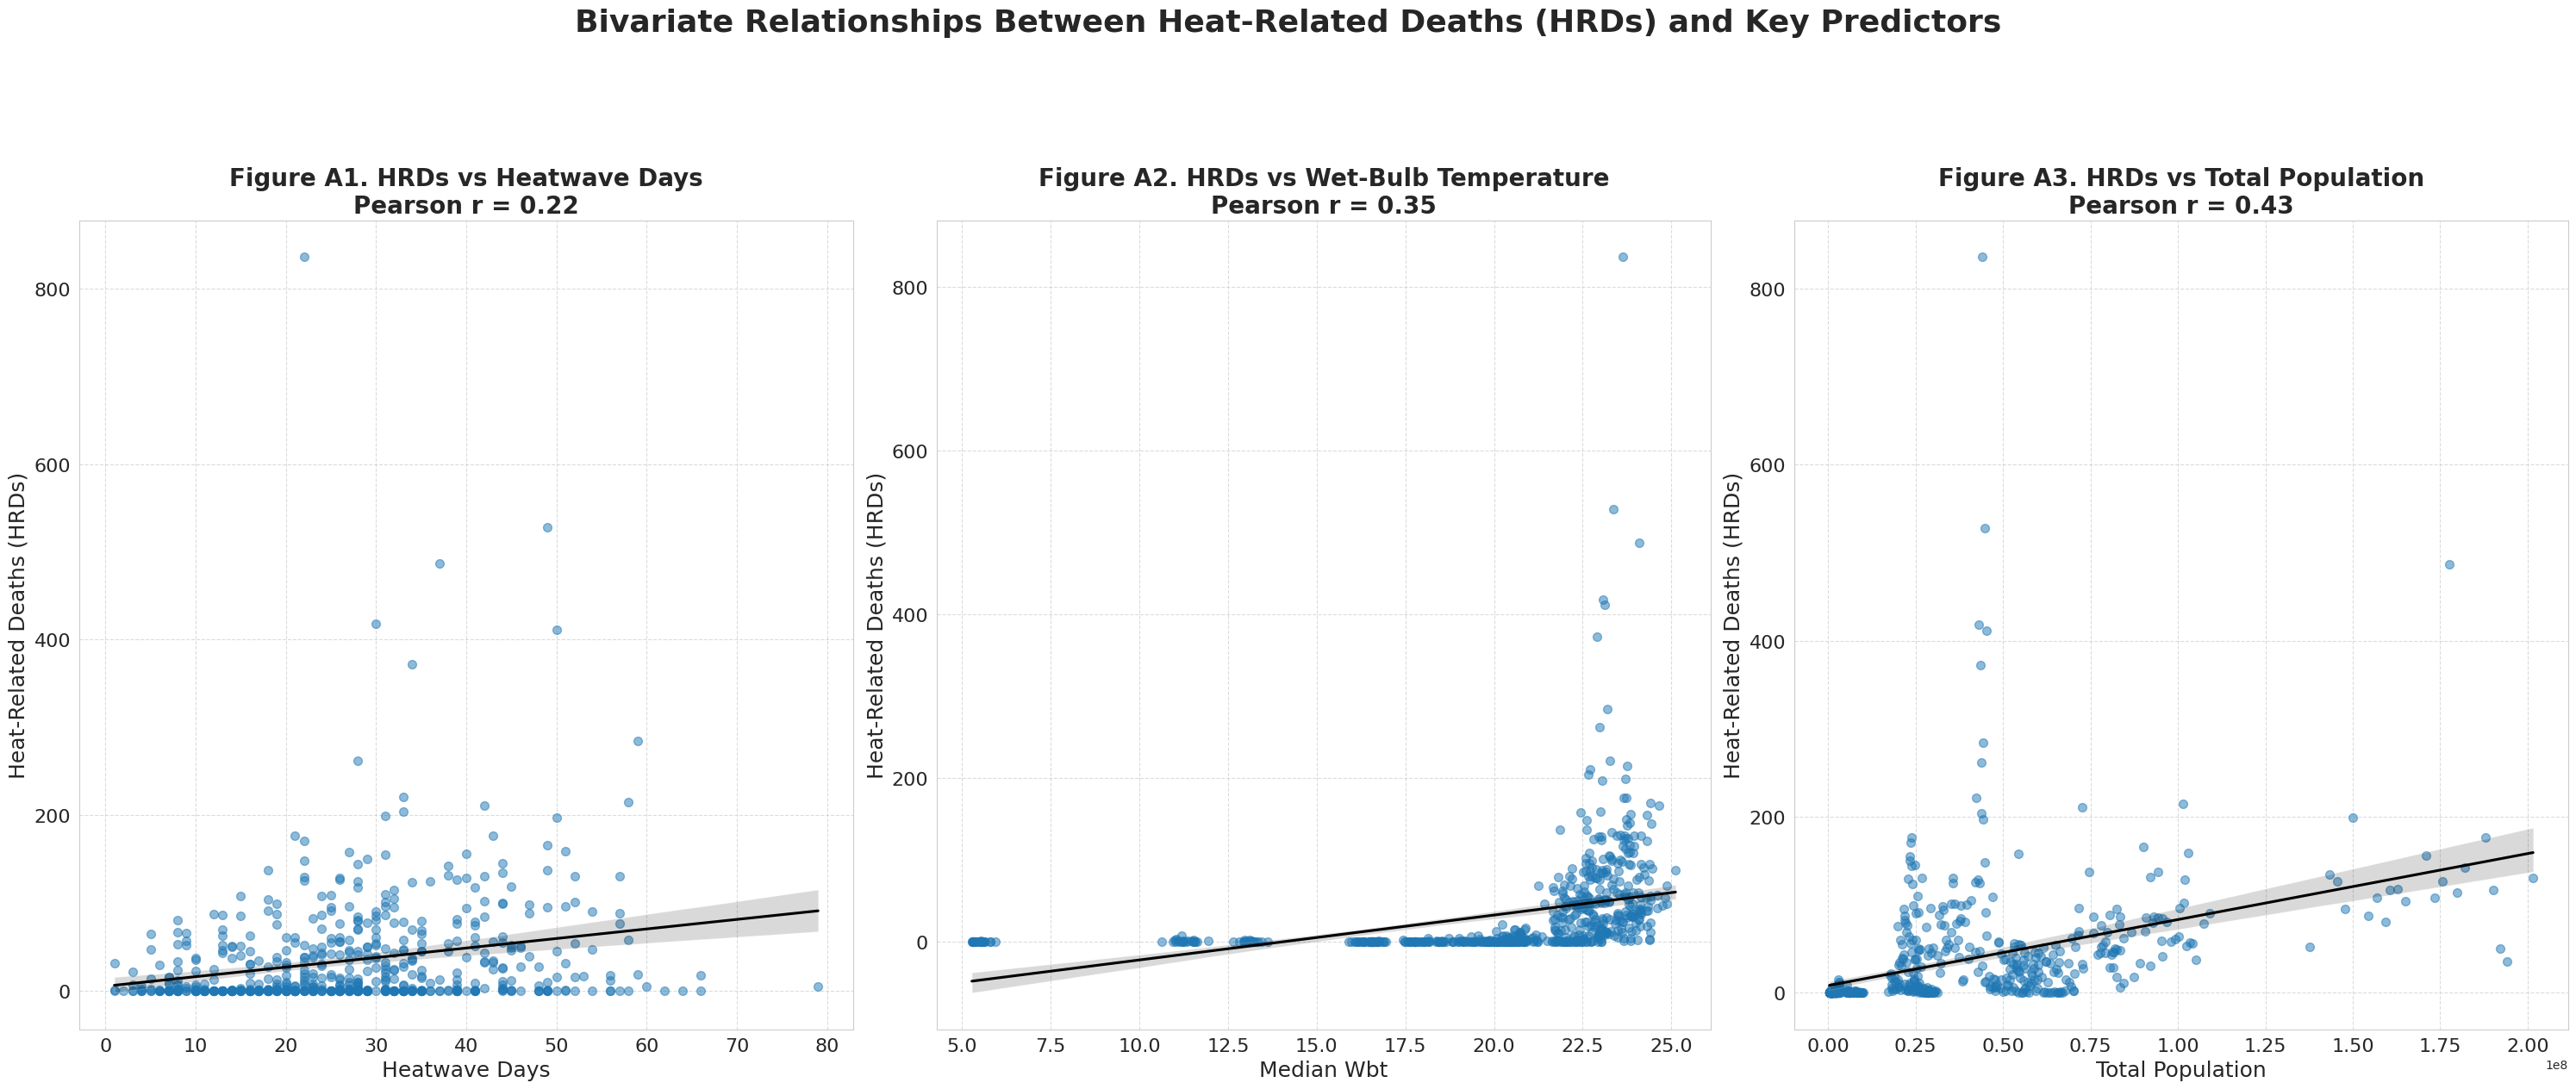

Saved to: /content/drive/MyDrive/Impact_Scholars/Figure2_HRDs_vs_Predictors_Updated.png


In [ ]:
# Bivariate relationship between HRDs and predictors

# Setup figure
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(30, 12))  # Bigger figure size
axes = axes.flatten()

# Define predictors and titles
predictors = ["heatwave_days", "median_wbt", "total_population"]
titles = [
    "Figure A1. HRDs vs Heatwave Days",
    "Figure A2. HRDs vs Wet-Bulb Temperature",
    "Figure A3. HRDs vs Total Population"
]

# Create plots with regression lines
for i, predictor in enumerate(predictors):
    ax = axes[i]
    sns.regplot(
        data=df,
        x=predictor,
        y="HRDs",
        ax=ax,
        scatter_kws={"alpha": 0.5, "s": 50},  # bigger scatter points
        line_kws={"color": "black"}
    )
    r = df[predictor].corr(df["HRDs"])
    ax.set_title(f"{titles[i]}\nPearson r = {r:.2f}", fontsize=20, fontweight="bold")
    ax.set_xlabel(predictor.replace("_", " ").title(), fontsize=18)
    ax.set_ylabel("Heat-Related Deaths (HRDs)", fontsize=18)
    ax.tick_params(axis="both", labelsize=16)
    ax.grid(True, linestyle="--", alpha=0.7)

# Final formatting
plt.suptitle("Bivariate Relationships Between Heat-Related Deaths (HRDs) and Key Predictors", fontsize=26, fontweight="bold", y=1.05)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save figure
output_path = "/content/drive/MyDrive/Impact_Scholars/Figure2_HRDs_vs_Predictors_Updated.png"
plt.savefig(output_path, dpi=500, bbox_inches="tight")
plt.show()

print(f"Saved to: {output_path}")


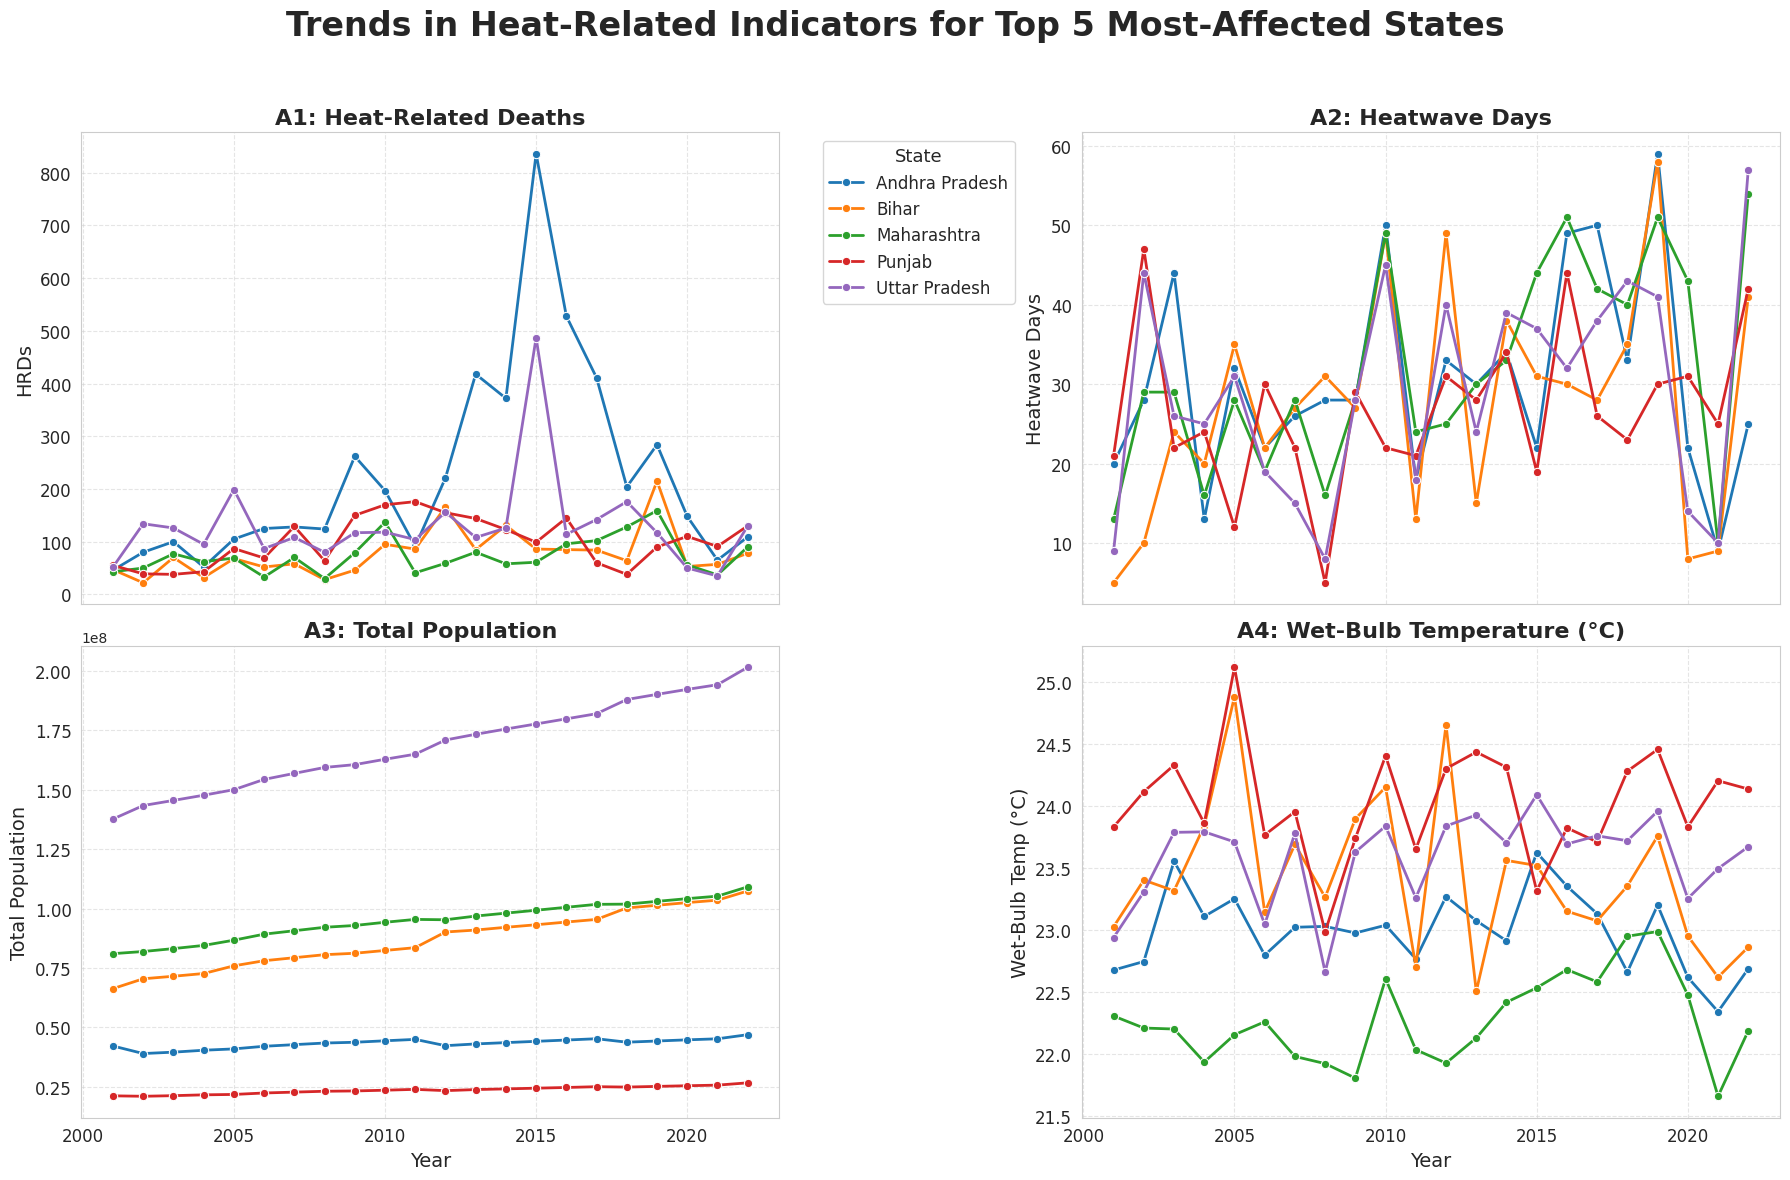

In [ ]:
# Trends in heat-related indicators

# Capitalize the state names properly
merged_df["state_ut"] = merged_df["state_ut"].str.strip().str.title()

# 1. Identify top 5 states by mean HRDs
top_states = (
    merged_df.groupby("state_ut")["HRDs"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)

# 2. Filter for those states
df_top = merged_df[merged_df["state_ut"].isin(top_states)]

# 3. Setup subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12), sharex=True)
axs = axs.flatten()

# 4. Variables and labels
variables = ["HRDs", "heatwave_days", "total_population", "median_wbt"]
titles = [
    "A1: Heat-Related Deaths",
    "A2: Heatwave Days",
    "A3: Total Population",
    "A4: Wet-Bulb Temperature (°C)"
]
ylabels = [
    "HRDs", "Heatwave Days", "Total Population", "Wet-Bulb Temp (°C)"
]
palette = "tab10"  # Distinct colors for states

# 5. Plot each panel
for i, var in enumerate(variables):
    sns.lineplot(
        data=df_top,
        x="year",
        y=var,
        hue="state_ut",
        marker="o",
        ax=axs[i],
        palette=palette,
        linewidth=2
    )
    axs[i].set_title(titles[i], fontsize=16, fontweight="bold")
    axs[i].set_ylabel(ylabels[i], fontsize=14)
    axs[i].set_xlabel("Year", fontsize=14)
    axs[i].tick_params(labelsize=12)
    axs[i].grid(True, linestyle="--", alpha=0.5)

    if i == 0:
        axs[i].legend(title="State", fontsize=12, title_fontsize=13, loc="upper left", bbox_to_anchor=(1.05, 1.0))
    else:
        axs[i].legend([],[], frameon=False)

# 6. Final layout
plt.suptitle("Trends in Heat-Related Indicators for Top 5 Most-Affected States", fontsize=24, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save
plt.savefig("/content/drive/MyDrive/Impact_Scholars/Top5States_Trends.png", dpi=400)

plt.show()


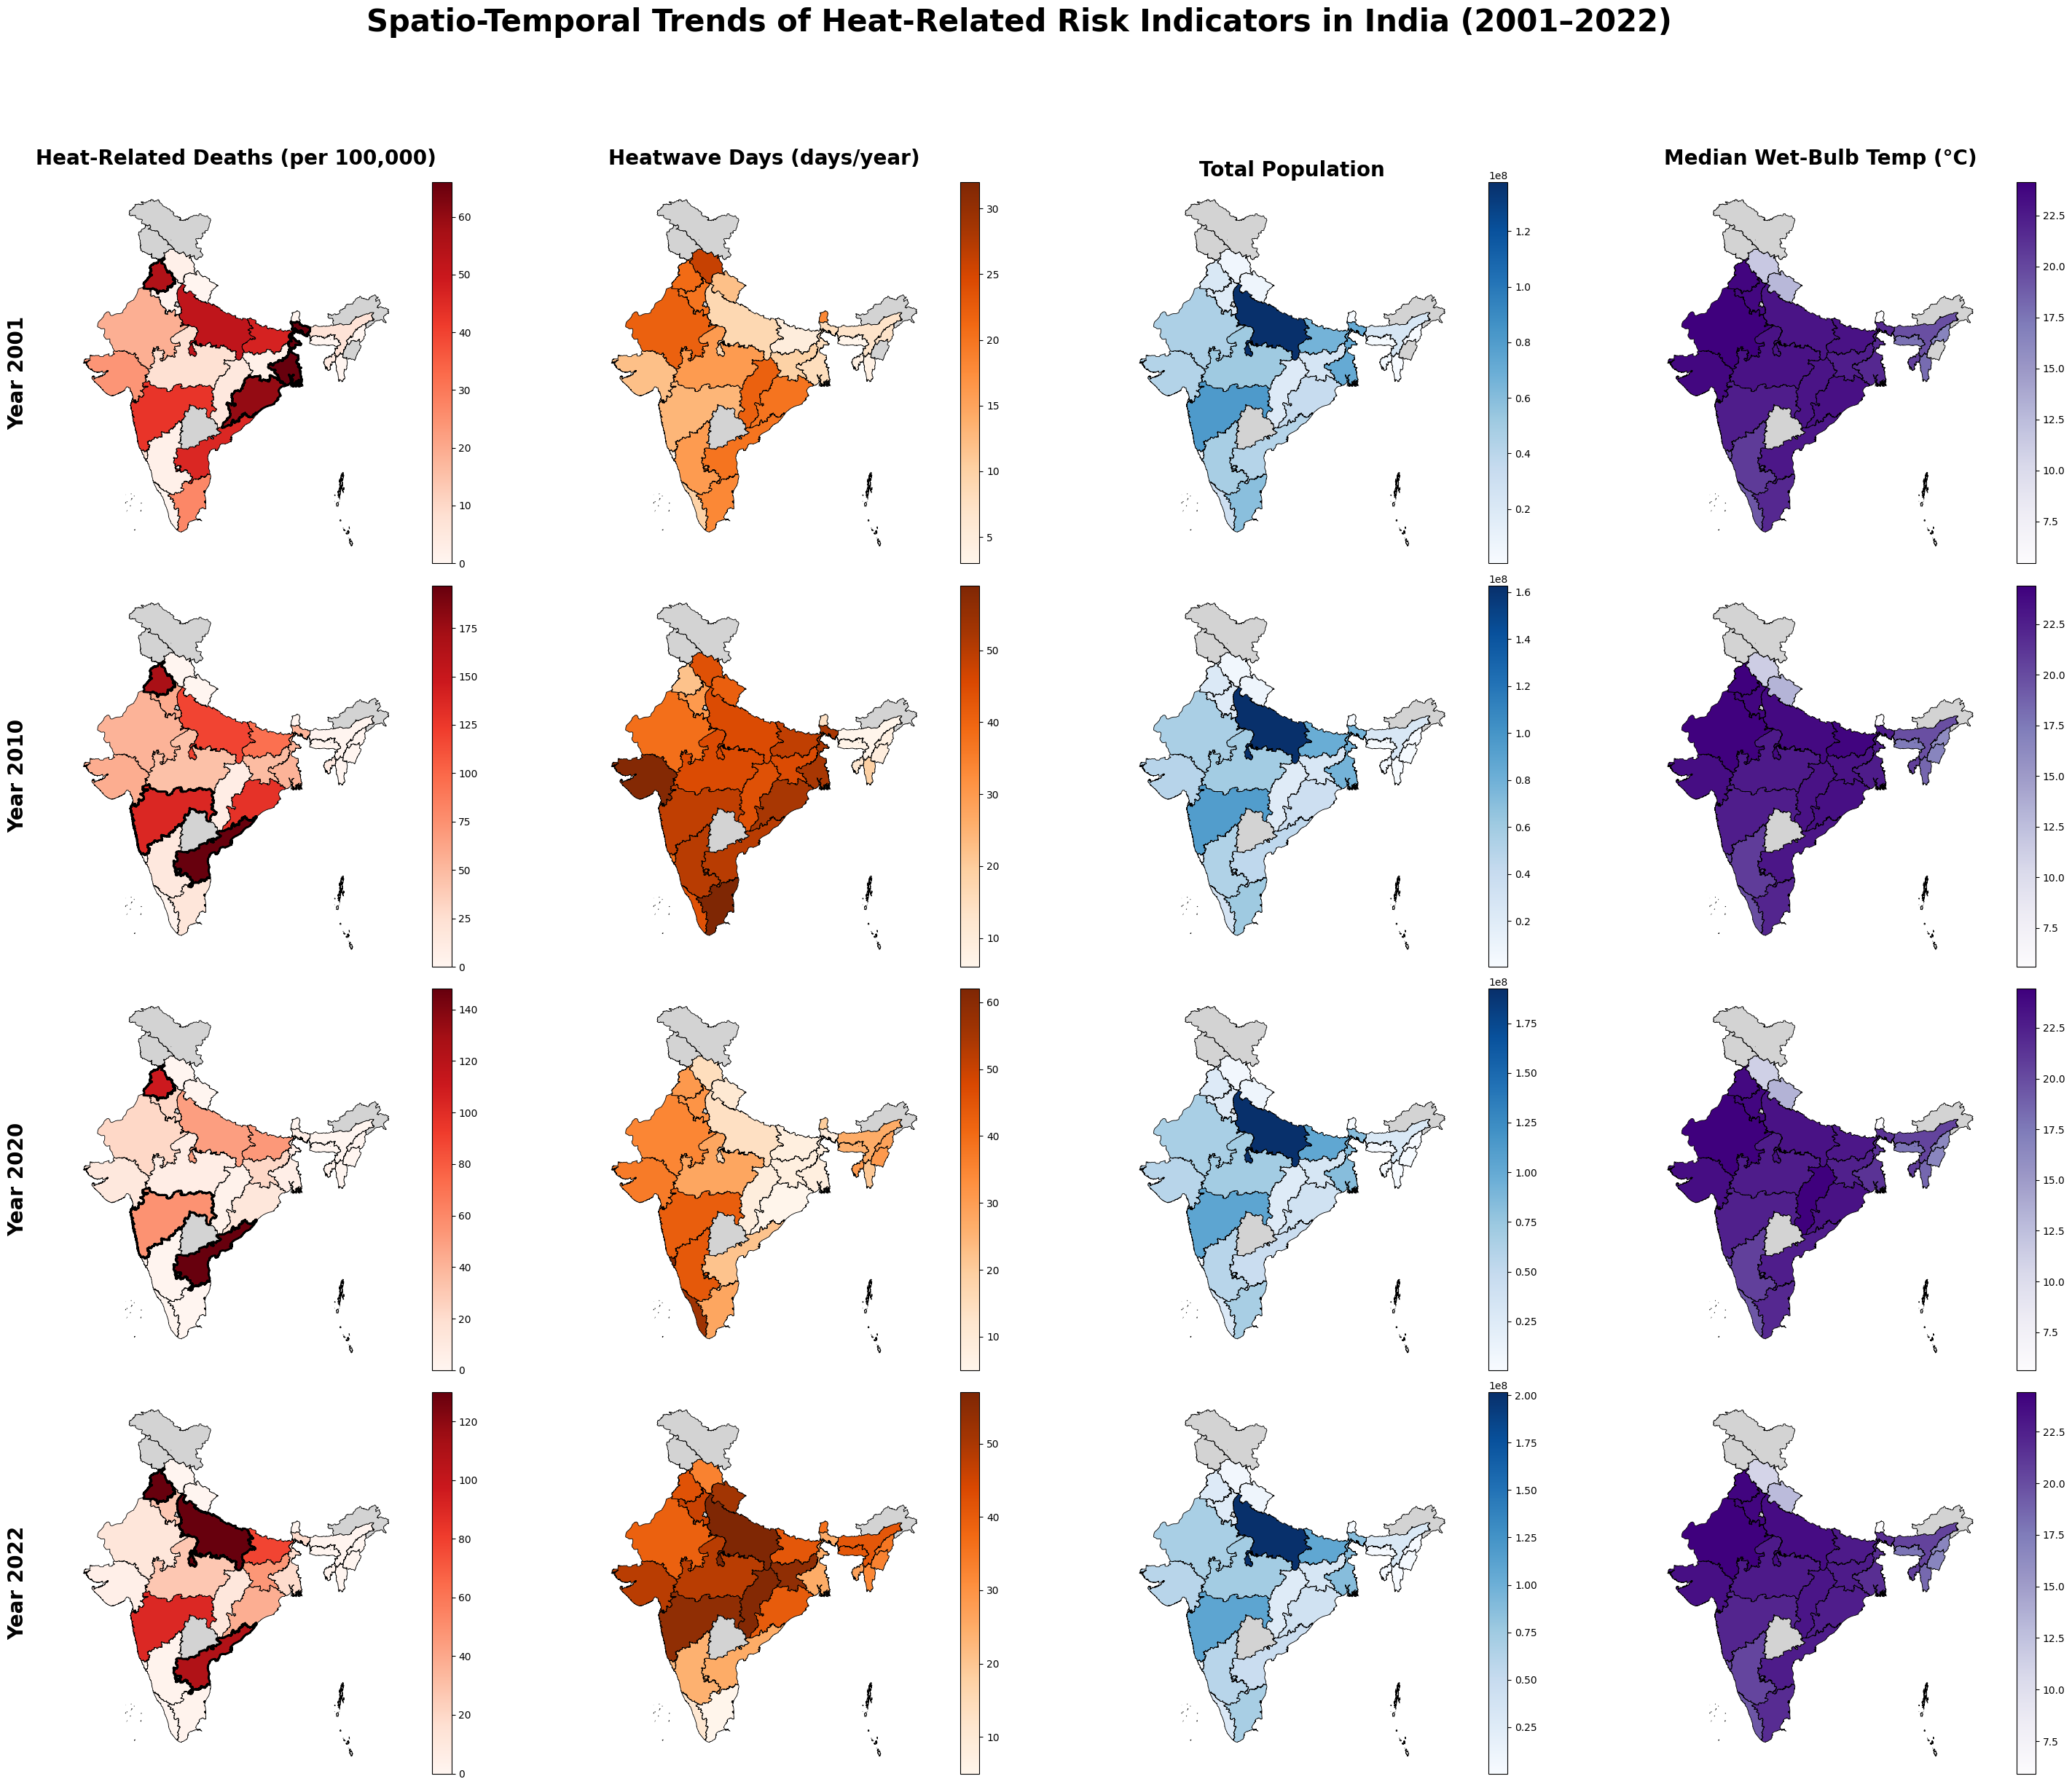

In [ ]:
# Spatio temporal trends

# Load merged dataset
df = pd.read_csv("/content/drive/MyDrive/Impact_Scholars/merged_with_uhi.csv")
df["state_ut"] = df["state_ut"].str.strip().str.lower()

# Load shapefile
gdf = gpd.read_file("/content/drive/MyDrive/LandScan/Indian_states_shapefile/State.shp")
gdf["state"] = gdf["state"].str.strip().str.lower()

# Setup
selected_years = [2001, 2010, 2020, 2022]
variables = ["HRDs", "heatwave_days", "total_population", "median_wbt"]
titles = {
    "HRDs": "Heat-Related Deaths (per 100,000)",
    "heatwave_days": "Heatwave Days (days/year)",
    "total_population": "Total Population",
    "median_wbt": "Median Wet-Bulb Temp (°C)"
}
colormaps = {
    "HRDs": "Reds",
    "heatwave_days": "Oranges",
    "total_population": "Blues",
    "median_wbt": "Purples"
}

# Create figure

fig, axes = plt.subplots(len(selected_years), len(variables), figsize=(30, 24))

# Loop through years and variables
for i, year in enumerate(selected_years):
    df_year = df[df["year"] == year].copy()
    df_year["state_ut"] = df_year["state_ut"].str.strip().str.lower()
    merged = gdf.merge(df_year, left_on="state", right_on="state_ut", how="left")

    # Top 3 states for HRDs
    top3_states = df_year.sort_values("HRDs", ascending=False).head(3)["state_ut"].tolist()

    for j, var in enumerate(variables):
        ax = axes[i, j]
        cmap = colormaps[var]

        # Plotting
        merged.plot(
            column=var,
            cmap=cmap,
            legend=True,
            edgecolor="black",
            linewidth=0.6,
            ax=ax,
            missing_kwds={"color": "lightgray", "label": "No data"},
        )

        # Highlight top 3 states for HRDs
        if var == "HRDs":
            for idx, row in merged.iterrows():
                if row["state_ut"] in top3_states:
                    gpd.GeoSeries(row.geometry).boundary.plot(ax=ax, edgecolor='black', linewidth=2)

        # No numeric labels now

        # Column headers
        if i == 0:
            ax.set_title(titles[var], fontsize=20, fontweight="bold")

        # Year labels (only at the start of each row)
        if j == 0:
            ax.text(
                -0.12, 0.5, f"Year {year}",
                transform=ax.transAxes,
                fontsize=20,
                fontweight="bold",
                ha="right",
                va="center",
                rotation=90
            )

        ax.axis("off")

# Final layout
plt.suptitle("Spatio-Temporal Trends of Heat-Related Risk Indicators in India (2001–2022)",
             fontsize=30, fontweight="bold", y=1.02)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(top=0.92)

# Save
plt.savefig("/content/drive/MyDrive/Impact_Scholars/Figure5_final.png", dpi=400, bbox_inches="tight")
plt.show()


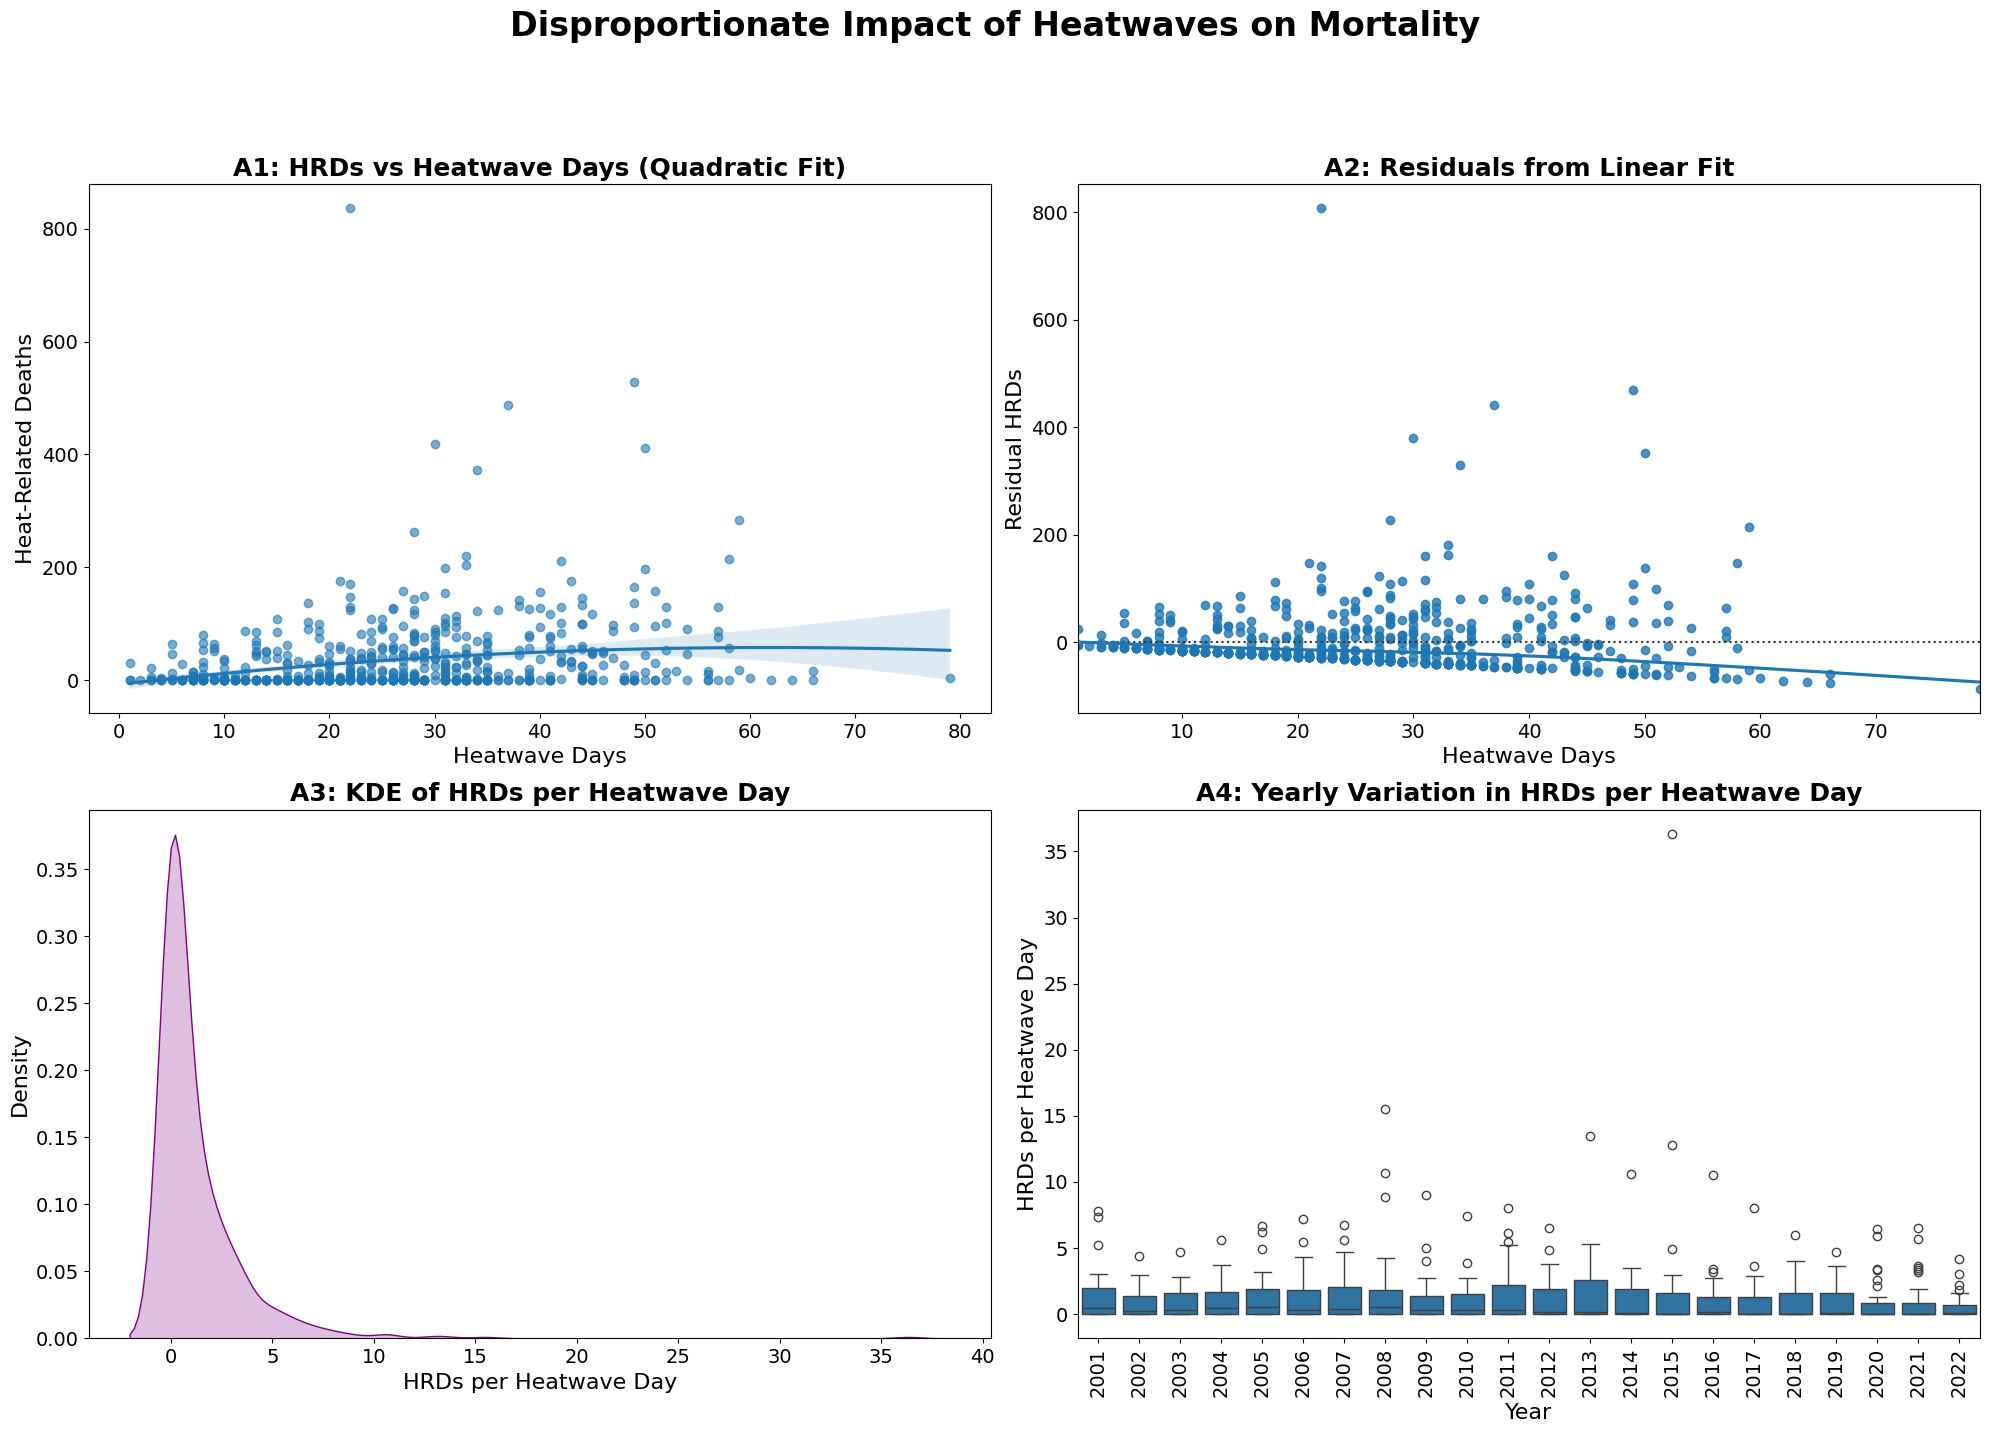

 Saved: /content/drive/MyDrive/Impact_Scholars/Figure4_Disproportionate_Impact_Final.png


In [ ]:
# Disproportionate impact of heatwaves on mortality


# Prepare data
df = merged_df.copy()
df["HRDs_per_hw_day"] = df["HRDs"] / (df["heatwave_days"] + 1)  # avoid div by zero

# Setup figure (bigger and cleaner)
fig, axes = plt.subplots(2, 2, figsize=(20, 14))  # Increased figure size!
plt.suptitle("Disproportionate Impact of Heatwaves on Mortality", fontsize=24, fontweight="bold", y=1.02)

# --- Panel A1: Scatter + regression line (Quadratic Fit) ---
sns.regplot(
    data=df,
    x="heatwave_days", y="HRDs",
    ax=axes[0, 0],
    order=2, ci=95, scatter_kws={'alpha': 0.6}
)
axes[0, 0].set_title("A1: HRDs vs Heatwave Days (Quadratic Fit)", fontsize=18, fontweight="bold")
axes[0, 0].set_xlabel("Heatwave Days", fontsize=16)
axes[0, 0].set_ylabel("Heat-Related Deaths", fontsize=16)
axes[0, 0].tick_params(axis='both', labelsize=14)

#  Panel A2: Residuals
model = sm.OLS(df["HRDs"], sm.add_constant(df[["heatwave_days"]])).fit()
residuals = model.resid
sns.residplot(x=df["heatwave_days"], y=residuals, ax=axes[0, 1], lowess=True)
axes[0, 1].set_title("A2: Residuals from Linear Fit", fontsize=18, fontweight="bold")
axes[0, 1].set_xlabel("Heatwave Days", fontsize=16)
axes[0, 1].set_ylabel("Residual HRDs", fontsize=16)
axes[0, 1].tick_params(axis='both', labelsize=14)

# Panel A3: KDE plot
sns.kdeplot(data=df["HRDs_per_hw_day"].dropna(), fill=True, ax=axes[1, 0], color="purple")
axes[1, 0].set_title("A3: KDE of HRDs per Heatwave Day", fontsize=18, fontweight="bold")
axes[1, 0].set_xlabel("HRDs per Heatwave Day", fontsize=16)
axes[1, 0].set_ylabel("Density", fontsize=16)
axes[1, 0].tick_params(axis='both', labelsize=14)

# Panel A4: Boxplot by Year
sns.boxplot(data=df, x="year", y="HRDs_per_hw_day", ax=axes[1, 1])
axes[1, 1].set_title("A4: Yearly Variation in HRDs per Heatwave Day", fontsize=18, fontweight="bold")
axes[1, 1].set_xlabel("Year", fontsize=16)
axes[1, 1].set_ylabel("HRDs per Heatwave Day", fontsize=16)
axes[1, 1].tick_params(axis='both', labelsize=14)
axes[1, 1].tick_params(axis='x', rotation=90)

# Save
output_path1 = "/content/drive/MyDrive/Impact_Scholars/Figure4_Disproportionate_Impact_Final.png"
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(output_path1, dpi=400, bbox_inches="tight")
plt.show()

print(f" Saved: {output_path1}")

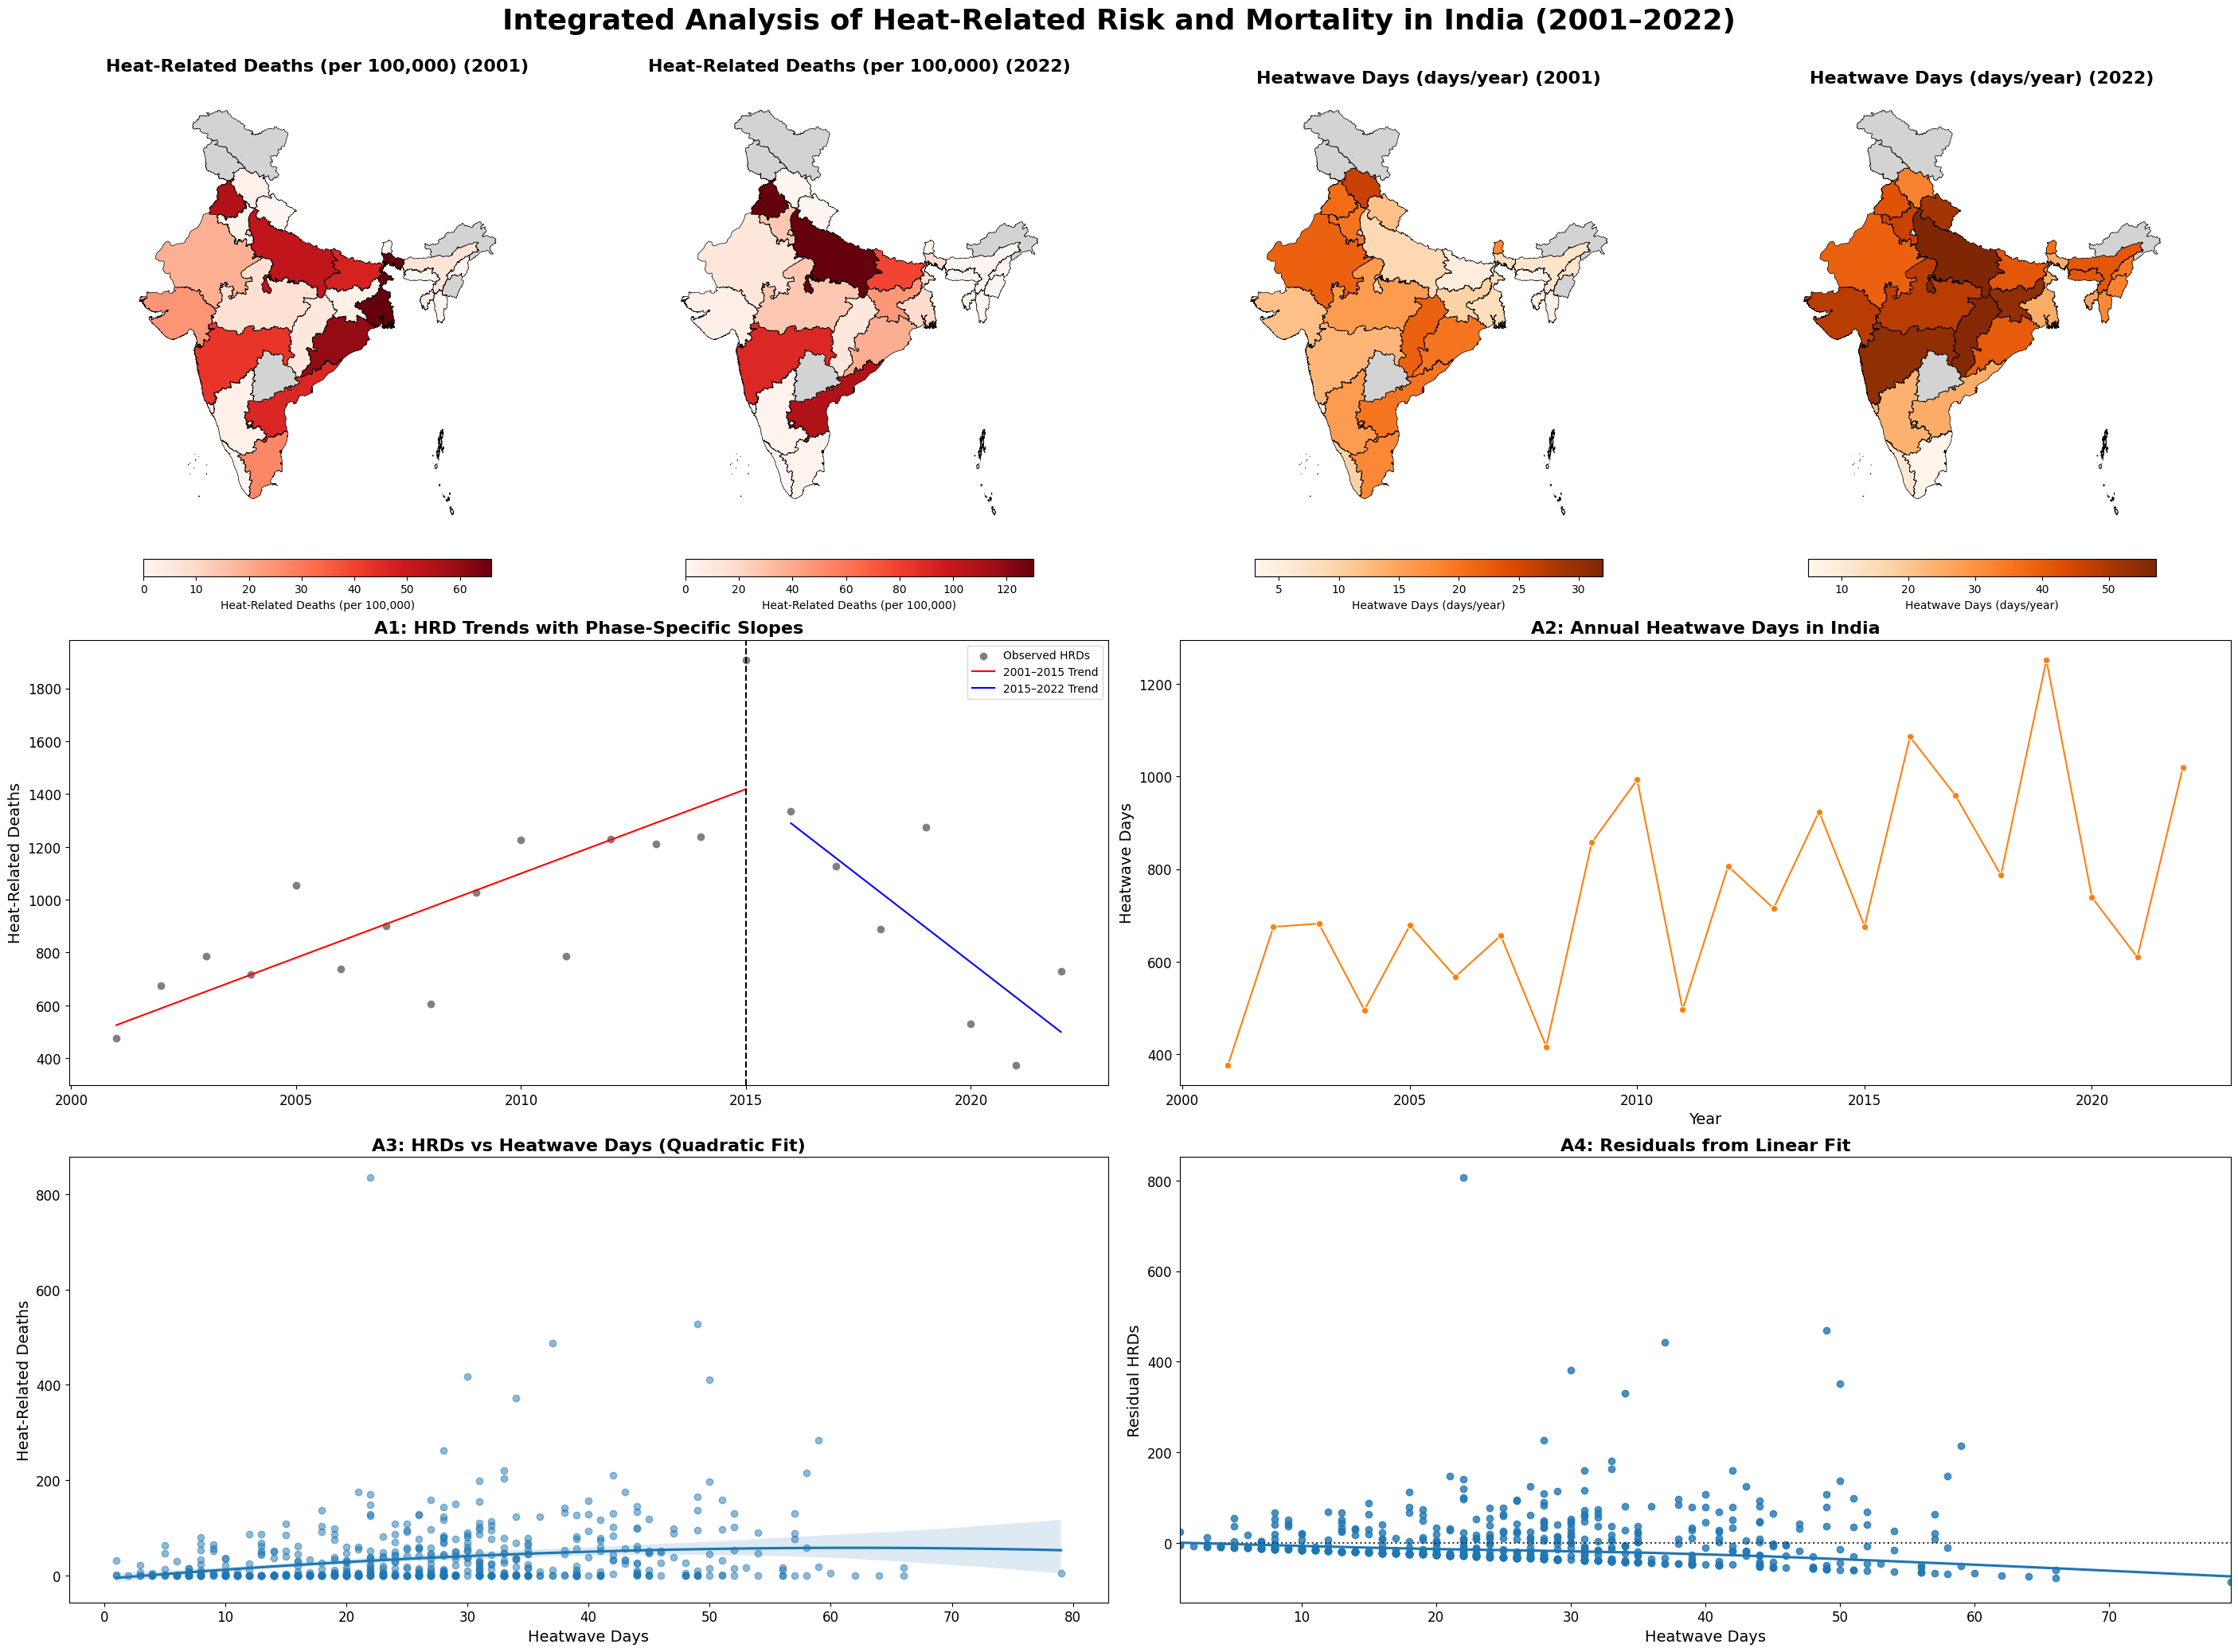

In [ ]:

# === Load data ===
#df = pd.read_csv("/content/drive/MyDrive/Impact_Scholars/merged_with_uhi.csv")
gdf = gpd.read_file("/content/drive/MyDrive/LandScan/Indian_states_shapefile/State.shp")

df["state_ut"] = df["state_ut"].str.strip().str.lower()
gdf["state"] = gdf["state"].str.strip().str.lower()

# === Variables and settings ===
selected_years = [2001, 2022]
map_vars = ["HRDs", "heatwave_days"]
map_titles = {
    "HRDs": "Heat-Related Deaths (per 100,000)",
    "heatwave_days": "Heatwave Days (days/year)"
}
colormaps = {
    "HRDs": "Reds",
    "heatwave_days": "Oranges"
}

# === Prepare trend data ===
df_yearly = df.groupby("year")[["HRDs", "heatwave_days", "total_population"]].sum().reset_index()
df_yearly["HRDs_per_hw_day"] = df_yearly["HRDs"] / (df_yearly["heatwave_days"] + 1)

# === OLS residuals ===
model = sm.OLS(df["HRDs"], sm.add_constant(df[["heatwave_days"]])).fit()
residuals = model.resid

# === Create main figure ===
fig = plt.figure(figsize=(28, 20), constrained_layout=True)
gs = fig.add_gridspec(3, 4, height_ratios=[1, 1, 1])  # 3 rows, 4 columns

# === Top Panel: 4 Map Plots (HRDs and Heatwave Days for 2001 and 2022) ===
plot_idx = 0
for var in map_vars:
    for year in selected_years:
        ax = fig.add_subplot(gs[0, plot_idx])
        df_year = df[df["year"] == year]
        merged = gdf.merge(df_year, left_on="state", right_on="state_ut", how="left")

        plot = merged.plot(
            column=var,
            cmap=colormaps[var],
            ax=ax,
            edgecolor="black",
            linewidth=0.5,
            legend=True,
            missing_kwds={"color": "lightgray", "label": "No data"},
            legend_kwds={
                "orientation": "horizontal",
                "shrink": 0.7,
                "pad": 0.05,
                "label": f"{map_titles[var]}"
            }
        )
        ax.set_title(f"{map_titles[var]} ({year})", fontsize=16, fontweight='bold')
        ax.axis("off")
        plot_idx += 1

# === Middle Panel: National Trend (HRDs + Heatwave Days) ===
df1 = df_yearly[df_yearly["year"] <= 2015]
df2 = df_yearly[df_yearly["year"] > 2015]
slope1, intercept1, r1, _, _ = linregress(df1["year"], df1["HRDs"])
slope2, intercept2, r2, _, _ = linregress(df2["year"], df2["HRDs"])

# HRD Trends
ax1 = fig.add_subplot(gs[1, :2])
ax1.scatter(df_yearly["year"], df_yearly["HRDs"], color="gray", label="Observed HRDs")
ax1.plot(df1["year"], intercept1 + slope1 * df1["year"], color="red", label="2001–2015 Trend")
ax1.plot(df2["year"], intercept2 + slope2 * df2["year"], color="blue", label="2015–2022 Trend")
ax1.axvline(x=2015, color="black", linestyle="--")
ax1.set_title("A1: HRD Trends with Phase-Specific Slopes", fontsize=16, fontweight="bold")
ax1.set_ylabel("Heat-Related Deaths", fontsize=14)
ax1.tick_params(labelsize=12)
ax1.legend()

# Heatwave Trends
ax2 = fig.add_subplot(gs[1, 2:])
sns.lineplot(data=df_yearly, x="year", y="heatwave_days", ax=ax2, marker="o", color="tab:orange")
ax2.set_title("A2: Annual Heatwave Days in India", fontsize=16, fontweight="bold")
ax2.set_ylabel("Heatwave Days", fontsize=14)
ax2.set_xlabel("Year", fontsize=14)
ax2.tick_params(labelsize=12)

# === Bottom Panel: Disproportionate Impact ===
ax3 = fig.add_subplot(gs[2, :2])
sns.regplot(data=df, x="heatwave_days", y="HRDs", ax=ax3, order=2, ci=95, scatter_kws={'alpha': 0.5})
ax3.set_title("A3: HRDs vs Heatwave Days (Quadratic Fit)", fontsize=16, fontweight="bold")
ax3.set_xlabel("Heatwave Days", fontsize=14)
ax3.set_ylabel("Heat-Related Deaths", fontsize=14)
ax3.tick_params(labelsize=12)

ax4 = fig.add_subplot(gs[2, 2:])
sns.residplot(x=df["heatwave_days"], y=residuals, ax=ax4, lowess=True)
ax4.set_title("A4: Residuals from Linear Fit", fontsize=16, fontweight="bold")
ax4.set_xlabel("Heatwave Days", fontsize=14)
ax4.set_ylabel("Residual HRDs", fontsize=14)
ax4.tick_params(labelsize=12)

# === Final Layout ===
plt.suptitle("Integrated Analysis of Heat-Related Risk and Mortality in India (2001–2022)",
             fontsize=26, fontweight="bold", y=1.03)

# Save and Show
plt.savefig("/content/drive/MyDrive/Impact_Scholars/Combined_Heat_Mortality_Analysis_Corrected.png", dpi=400, bbox_inches="tight")
plt.show()
